<a href="https://colab.research.google.com/github/rilschultz/CS167Notes/blob/main/Notebook6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name:
Date:

## Problem Description:



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [3]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/datasets/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/datasets/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Mounted at /content/drive
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [6]:
# Build your CNN here
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=8, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

<ipython-input-7-8833cba9acf9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results = model.fit_generator(


Epoch 1/8
163/163 [==============================] - 802s 5s/step - loss: 0.3085 - accuracy: 0.8712 - val_loss: 0.5667 - val_accuracy: 0.7676
Epoch 2/8
163/163 [==============================] - 17s 106ms/step - loss: 0.1606 - accuracy: 0.9394 - val_loss: 0.5773 - val_accuracy: 0.7740
Epoch 3/8
163/163 [==============================] - 18s 109ms/step - loss: 0.1371 - accuracy: 0.9498 - val_loss: 0.5069 - val_accuracy: 0.8013
Epoch 4/8
163/163 [==============================] - 18s 109ms/step - loss: 0.1324 - accuracy: 0.9486 - val_loss: 0.6479 - val_accuracy: 0.7821
Epoch 5/8
163/163 [==============================] - 17s 106ms/step - loss: 0.1211 - accuracy: 0.9530 - val_loss: 1.1419 - val_accuracy: 0.7035
Epoch 6/8
163/163 [==============================] - 17s 106ms/step - loss: 0.1030 - accuracy: 0.9638 - val_loss: 0.8075 - val_accuracy: 0.7548
Epoch 7/8
163/163 [==============================] - 18s 109ms/step - loss: 0.1040 - accuracy: 0.9615 - val_loss: 1.2230 - val_accuracy: 0

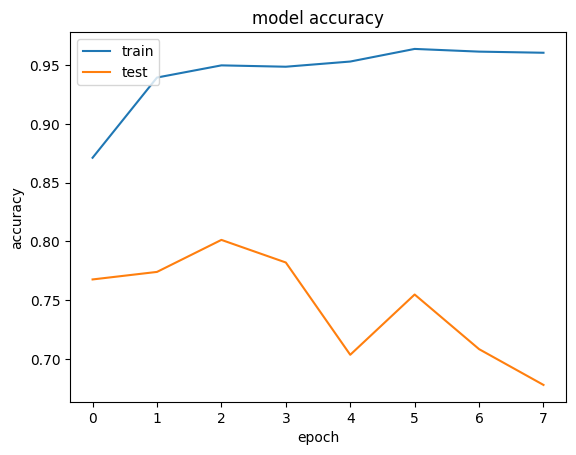

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
#We'll try a second model, this time with pooling layers after each convolutional layer
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

<ipython-input-14-f5667125fadd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results2 = model2.fit_generator(


Epoch 1/10
163/163 [==============================] - 17s 105ms/step - loss: 0.0932 - accuracy: 0.9640 - val_loss: 0.6580 - val_accuracy: 0.7949
Epoch 2/10
163/163 [==============================] - 17s 107ms/step - loss: 0.0941 - accuracy: 0.9643 - val_loss: 0.7768 - val_accuracy: 0.7660
Epoch 3/10
163/163 [==============================] - 17s 104ms/step - loss: 0.0885 - accuracy: 0.9680 - val_loss: 0.7391 - val_accuracy: 0.7772
Epoch 4/10
163/163 [==============================] - 17s 104ms/step - loss: 0.0849 - accuracy: 0.9695 - val_loss: 0.8211 - val_accuracy: 0.7548
Epoch 5/10
163/163 [==============================] - 18s 113ms/step - loss: 0.0793 - accuracy: 0.9689 - val_loss: 1.0057 - val_accuracy: 0.7420
Epoch 6/10
163/163 [==============================] - 19s 114ms/step - loss: 0.0736 - accuracy: 0.9722 - val_loss: 1.3263 - val_accuracy: 0.7099
Epoch 7/10
163/163 [==============================] - 17s 106ms/step - loss: 0.0719 - accuracy: 0.9741 - val_loss: 0.9376 - val_ac

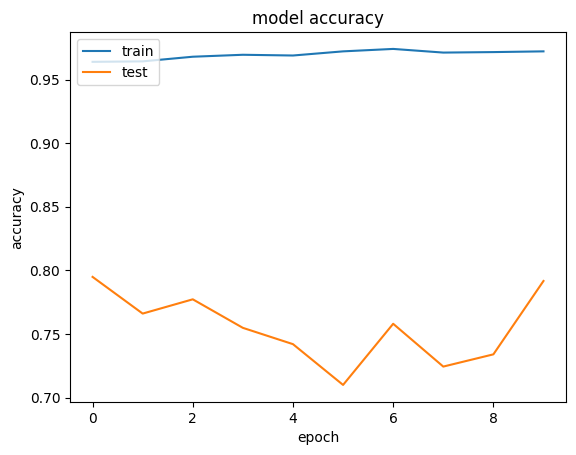

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

By creating the model without the pooling steps there was a lower accuracy and longer runtime, when adding in the pooling steps it helped reduce time dramitically and increase accuracy while also helping with validation accuracy among more epochs